# 심층 신경망

**목표: 인공 신경망에 층을 여러 개 추가하여 패션 MNIST 데이터셋을 분류하면서 케라스로 심층 신경망을 만드는 방법을 자세히 배웁니다.**

- 심층 신경망: 2개 이상의 층을 포함한 신경망입니다. 종종 다층 인공 신경망, 심층 신경망, 딥
러닝을 같은 의미로 사용합니다.
- 렐루 함수: 이미지 분류 모델의 은닉층에 많이 사용하는 활성화 함수입니다. 시그모이드 함수는 층이 많을수록 활성화 함수의 양쪽 끝에서 변화가 작기 때문에 학습이 어려워집니다. 렐루 함수는 이런 문제가 없으며 계산도 간단합니다.
- 옵티마이저: 신경망의 가중치와 절편을 학습하기 위한 알고리즘 또는 방법을 말합니다. 케라스에는 다양한 경사 하강법 알고리즘이 구현되어 있습니다. 대표적으로 SGD, 네스테로프 모멘텀, RMSprop. Adam 등이 있습니다.

In [ ]:
# 케라스 API를 사용해서 패션 MNIST 데이터셋 생성

import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 인공신경망(ANN)에 2개의 층 추가

In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
# 표준화 전처리
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

- 은닉층: 입력층과 출력층 사이에 있는 모든 층 
- 은닉층에는 활성화 함수가 표시되어 있다.
- 활성화 함수는 신경망 층의 선형 방정식의 계산 값에 적용하는 함수이다.
-  은닉층의 활성화 함수: 시그모이드 함수, 렐루 함수

>층을 추가하는 방법
1. Dense 클래스의 객체 dense1, dense2를 만들어 Sequential 클래스에 전달한다.
2. Sequential 클래스의 생성자 안에서 바로 Dense 클래스의 객체를 만든다.
3. Sequential 클래스의 객체를 만들고 이 객체의 add() 메서드를 호출하여 층을 추가한다

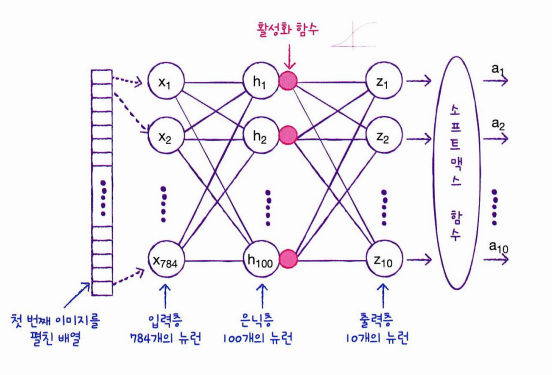

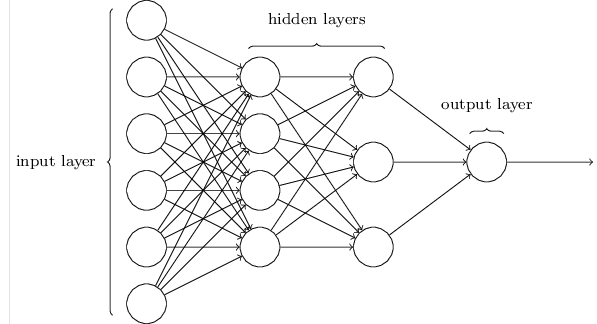

**분류 문제를 위한 신경망의 출력층에는 시그모이드 함수(이진분류)나 소프트맥스 함수(다중분류)를 활성화 함수로 사용합니다.**


**회귀를 위한 신경망의 출력층에서는 Dense층의 activation 매개변수에 아무런 값을 지정하지 않는다.**



```
1. Dense 클래스의 객체 dense1, dense2를 만들어 Sequential 클래스에 전달한다.
```



In [ ]:
# 은닉층(dense1): 출력층의 뉴런보다 많게 만들어야 한다.
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))  # (은닉층의 뉴런의 개수, 활성화 함수, 입력의 크기)

# 출력층(dense2)
dense2 = keras.layers.Dense(10, activation='softmax')   # 10개의 클래스이어서 10개의 뉴런


# 은닉층의 뉴런의 개수가 너무 많으면 모델 복잡도가 높아져 과적합이 일어난다. 적절한 뉴런의 개수를 지정하는 것이 좋다.

## 심층 신경망(DNN) 만들기

In [ ]:
model = keras.Sequential([dense1, dense2])  # 리스트는 가장 처음 등장하는 은닉층에서 마지막 출력층의 순서로 나열해야 한다.

In [ ]:
model.summary() # 층에 대한 정보 출력

"""
층 이름, 
클래스, 
출력 크기: 첫번째 차원은 샘플의 개수를 나타낸다. 샘플의 개수가 아직 정의 되어 있지 않기 때문에 None이다. 
            두번째 차원은 은닉층의 뉴런의 개수이다.
모델 파라미터 개수: 가중치와 절편 계산 (784개 X 100개 + 100개 = 78500), (100개 X 10개 + 10개 = 1010개)


총 모델 파라미터 개수와 훈련되는 파라미터 개수가 동일하게 79,510개-> 은닉층과 출력층의 파라미터 개수를 합친 값
훈련되지 않는 파라미터 (Non-trainable params): 간혹 경사 하강법으로 훈련되지 않는 파라미터를 가진 층이 있다.
"""

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 100)               78500     
                                                                 
 dense_35 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


'\n층 이름, \n클래스, \n출력 크기: 첫번째 차원은 샘플의 개수를 나타낸다. 샘플의 개수가 아직 정의 되어 있지 않기 때문에 None이다. \n            두번째 차원은 은닉층의 뉴런의 개수이다.\n모델 파라미터 개수: 가중치와 절편 계산 (784개 X 100개 + 100개 = 78500), (100개 X 10개 + 10개 = 1010개)\n\n\n총 모델 파라미터 개수와 훈련되는 파라미터 개수가 동일하게 79,510개-> 은닉층과 출력층의 파라미터 개수를 합친 값\n훈련되지 않는 파라미터 (Non-trainable params): 간혹 경사 하강법으로 훈련되지 않는 파라미터를 가진 층이 있다.\n'

## 층을 추가하는 다른 방법



```
2. Sequential 클래스의 생성자 안에서 바로 Dense 클래스의 객체를 만든다.

```



In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

In [ ]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________




```
3. Sequential 클래스의 객체를 만들고 이 객체의 add() 메서드를 호출하여 층을 추가한다.
```



In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 100)               78500     
                                                                 
 dense_31 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# > 원-핫 인코딩으로 변경하지 않았을때, sparse_categorical_crossentropy 정수로된 타깃값을 사용해 크로스 엔트로피 손실을 계산한다.
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3199 - accuracy: 0.8835
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3073 - accuracy: 0.8872
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2975 - accuracy: 0.8921
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2870 - accuracy: 0.8955
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2787 - accuracy: 0.8970


## 렐루 활성화 함수

렐루 함수: 입력이 양수일 경우 마치 활성화 함수가 없는 것처럼 그냥 입력을 통과시키고 음수일 경우에는 0으로 만든다. 

- 렐루 함수는 특히 이미지 처리에서 좋은 성능을 낸다고 알려져 있다.

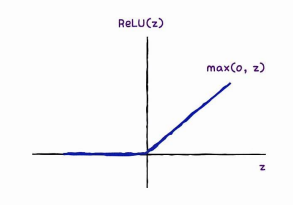

Flatten 클래스
- 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할
- 입력에 곱해지는 가중치나 절편이 없다.
- Flatten 클래스를 층처럼 입력층과 은닉층 사이에 추가, 입력층 바로 뒤에 추가
- 학습하는 층이 아니다.


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 100)               78500     
                                                                 
 dense_35 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5375 - accuracy: 0.8102
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3970 - accuracy: 0.8571
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3557 - accuracy: 0.8710
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3318 - accuracy: 0.8809
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3157 - accuracy: 0.8859


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3595 - accuracy: 0.8758


[0.35947713255882263, 0.8758333325386047]

## 옵티마이저

- 옵티마이저: 신경망의 가중치와 절편을 학습하기 위한 알고리즘 또는 방법을 말합니다. 케라스에는 다양한 경사 하강법 알고리즘이 구현되어 있습니다. 대표적으로 SGD, 네스테로프 모멘텀, RMSprop. Adam 등이 있습니다

In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')



```
 확률적 경사하강법 SGD:  미니배치를 사용
- 데이터를 한 번에 모두 사용하지 않고 잘게 나누어 여러 번에 걸쳐 경사 하강법 단계를 수행합니다
```



In [ ]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')    #optimizer 매개변수를 'sgd'로 지정

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [ ]:
"""기본 경사 하강법 옵티마이저는 모두 SGD 클래스에서 제공합니다. SGD 클래스의 momentum
매개변수의 기본값은 0입니다. 이를 0보다 큰 값으로 지정하면 마치 이전의 그레이디언트를 가속도
처럼 사용하는 모멘텀 최적화nmmentum optimization를 사용합니다. 보통 momentum 매개변수는 0.9
이상을 지정합니다.
다음처럼 SGD 클래스의 nesterov 매개변수를 기본고수 False에서 True로 바꾸면 네스테로프 모멘
텀 최적화를 사용합니다
"""
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

네스테로프 모멘텀은 모멘텀 최적화를 2번 반복하여 구현합니다. 대부분의 경우 네스테로프 모멘텀
최적화가 기본 확률적 경사 하강법보다 더 나은 성능을 제공합니다.

In [ ]:
# 적응적 학습률을 사용하는 대표적인 옵티마이저는 Adagrad와 RMSprop
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 7s 3ms/step - loss: 0.5246 - accuracy: 0.8174
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3962 - accuracy: 0.8583
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3561 - accuracy: 0.8704
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3311 - accuracy: 0.8800
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3116 - accuracy: 0.8847


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3569 - accuracy: 0.8712


[0.35693681240081787, 0.8712499737739563]